<a href="https://colab.research.google.com/github/maxashoka3/Rossmann-Sales-Prediction/blob/main/Rossmann_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Packages

In [2]:
#Import Packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **2.Data Preprocessing**
    2.1 Load Dataset

In [3]:
#importing the both data
rossmann_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Machine Learning Project/Rossmann Retail Sales Prediction/Rossmann Stores Data.csv',
                          parse_dates = True, index_col = 'Date')
store = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Machine Learning Project/Rossmann Retail Sales Prediction/store.csv')


In [4]:
# No of rows and columns in rossmann dataset
print("# of observations & # of features", rossmann_df.shape)
rossmann_df.head()

# of observations & # of features (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [5]:
# Getting the Rossmann dataset information
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [6]:
# Getting the Description of Rossmann Dataset
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
print("# of observations & # of features", store.shape)
store.head()

# of observations & # of features (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


2.2 Dealing with Missing Values

2.2.1 Count missing values in each dataset

In [8]:
print(f"rossmann dataset : \n{rossmann_df.isnull().sum()}")
print(f"\n\n Store: \n{store.isnull().sum()}")

rossmann dataset : 
Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


 Store: 
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


**2.2.2 Remove features with high percentages of missing values**

we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.

In [9]:
# removing features
store = store.drop(['CompetitionOpenSinceMonth', 
                    'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

Text(0.5, 1.0, 'Distribution of Store Competition Distance')

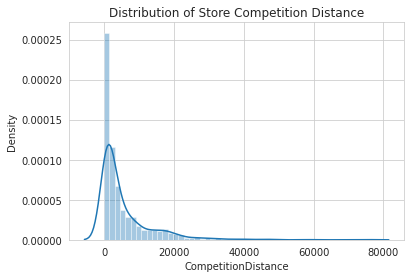

In [10]:
# CompetitionDistance is distance in meters to the nearest competitor
sns.distplot(store.CompetitionDistance.dropna())
plt.title("Distribution of Store Competition Distance")

**The distribution is right skewed, so we'll replace missing values with the median.**

In [11]:
# replace missing values in Competition Distance with median for the store dataset
store.CompetitionDistance.fillna(store.CompetitionDistance.median(),inplace = True)

**2.3 Data Extraction**

In [12]:
rossmann_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [13]:
# extract year, month, day and week of year from 'Date
rossmann_df['Year'] = rossmann_df.index.year
rossmann_df['Month'] = rossmann_df.index.month
rossmann_df['Day'] = rossmann_df.index.day
rossmann_df['WeekOfYear'] = rossmann_df.index.weekofyear
rossmann_df = rossmann_df.reset_index()

**2.4  Joining Tables**

In [14]:
# Joining the rossman dataset and store dataset
df = pd.merge(rossmann_df,store,how = 'left',on = 'Store')
df.head().T

,0,1,2,3,4
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
Year,2015,2015,2015,2015,2015


In [15]:
print(f'The length of new dataframe is : {len(df)}')

The length of new dataframe is : 1017209


**2.5 Drop Subsets of Data where might Cause Bias**

In [16]:
# Checking the unique value of 'Open' features
df['Open'].unique()

array([1, 0])

Here open has two variables 
* 0 ---- Store has Closed
* 1 ---- Store has Oened

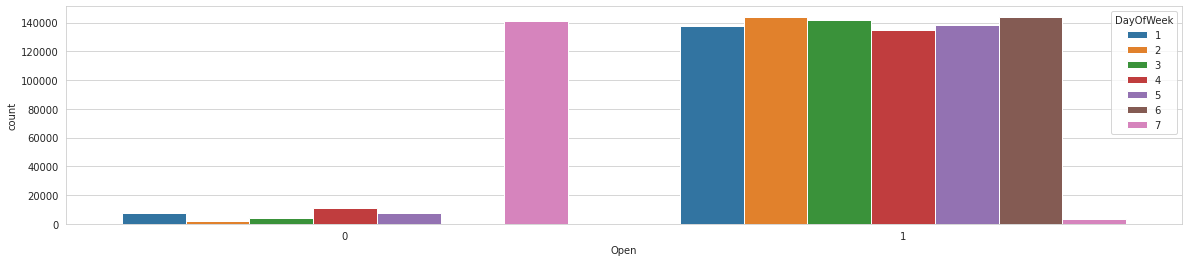

In [17]:
fig, ax = plt.subplots(1,figsize=(20,4))
sns.countplot(x='Open',hue='DayOfWeek', data=df, ax=ax)

The above graph creates a question how **stores are selling when they are closed**.
So we will delete the rows which are closed..

In [18]:
# Selecting the store which are opened
df = df[df['Open'] == 1]

In [19]:
# Now we can delete the features Open as it will create bias
df = df.drop('Open',axis = 1)


Total Number of store with zero sales : 54



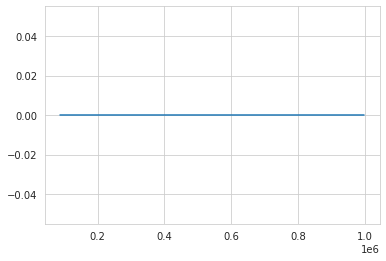

In [20]:
#  Checking the store with zero sales
zero_sales = df[df.Sales == 0]
print(f'Total Number of store with zero sales : {len(zero_sales)}\n')
zero_sales['Sales'].plot()

In [21]:
df.Sales.describe()

count    844392.000000
mean       6955.514291
std        3104.214680
min           0.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

In [22]:
df.drop(df[ (df.Sales < 1)].index,inplace=True)

In [23]:
print(f'The length of new dataframe is : {len(df)}')

The length of new dataframe is : 844338


**2.6 Feature Engineering**

In [24]:
# Getting the information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 844338 non-null  datetime64[ns]
 1   Store                844338 non-null  int64         
 2   DayOfWeek            844338 non-null  int64         
 3   Sales                844338 non-null  int64         
 4   Customers            844338 non-null  int64         
 5   Promo                844338 non-null  int64         
 6   StateHoliday         844338 non-null  object        
 7   SchoolHoliday        844338 non-null  int64         
 8   Year                 844338 non-null  int64         
 9   Month                844338 non-null  int64         
 10  Day                  844338 non-null  int64         
 11  WeekOfYear           844338 non-null  int64         
 12  StoreType            844338 non-null  object        
 13  Assortment   

**2.6.1 Categorical Data**

We should not encoding we are using the random forest or the esemble learning algorithm. But we will be using other algotrithm also

2.6.1.1   Nominal Variables



In [25]:
#Categorical data 
li = li = df.select_dtypes(include=["object_"])

for i in li:
  print(i)
  print(df[i].unique())
  print("-----------------------")

StateHoliday
['0' 'a' 'b' 'c' 0]
-----------------------
StoreType
['c' 'a' 'd' 'b']
-----------------------
Assortment
['a' 'c' 'b']
-----------------------


We can see there are two **0** with numerical and integer types.So we need to convert it to string.

In [26]:
df.dropna(inplace = True)

In [27]:
#converting to string type
df.loc[df.StateHoliday == 0,'StateHoliday'] = df.loc[df.StateHoliday == 0,'StateHoliday'].astype(str)

In [28]:
#Check again
set(df.StateHoliday)

{'0', 'a', 'b', 'c'}

In [29]:
df = pd.get_dummies(df,drop_first = True)

In [30]:
df.head()

,Date,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,2015-07-31,1,5,5263,555,1,1,2015,7,31,31,1270.0,0,0,0,0,0,1,0,0,0
1,2015-07-31,2,5,6064,625,1,1,2015,7,31,31,570.0,1,0,0,0,0,0,0,0,0
2,2015-07-31,3,5,8314,821,1,1,2015,7,31,31,14130.0,1,0,0,0,0,0,0,0,0
3,2015-07-31,4,5,13995,1498,1,1,2015,7,31,31,620.0,0,0,0,0,0,1,0,0,1
4,2015-07-31,5,5,4822,559,1,1,2015,7,31,31,29910.0,0,0,0,0,0,0,0,0,0


### **3.Exploratory Data Analysis**

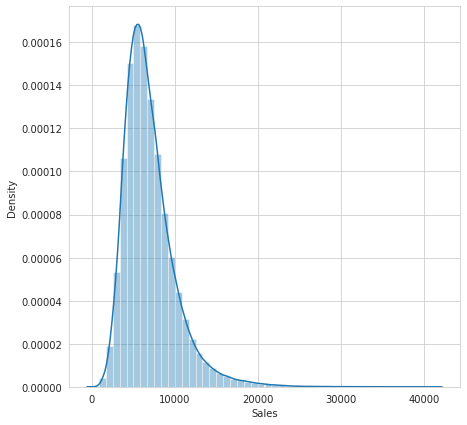

In [31]:
plt.figure(figsize=(7,7))
sns.distplot(df['Sales'])

Data is slightly right skewed

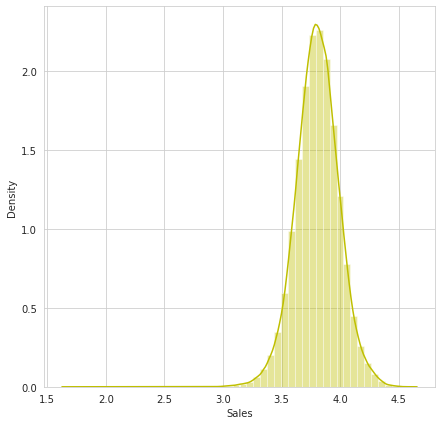

In [32]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['Sales']),color="y")

Even after taking log it really doesnt makes any changes.

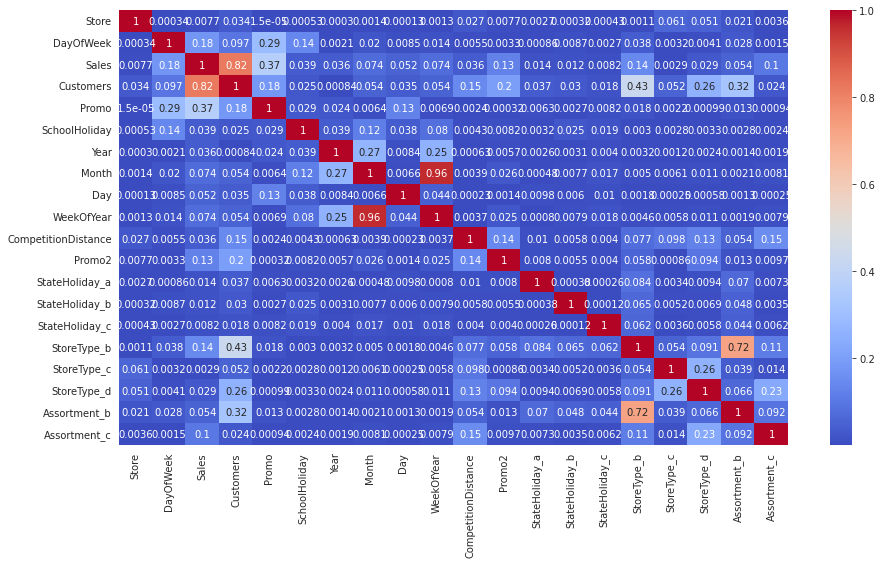

In [33]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Some of the features have Multi-colinearity with each other.So we need to remove it.But it is not necessary for the CART or esemble learning i.e xgboost,random forest

In [34]:
df_m = df.copy()

In [35]:
df.drop(['StoreType_b','WeekOfYear'],inplace = True,axis = 1)

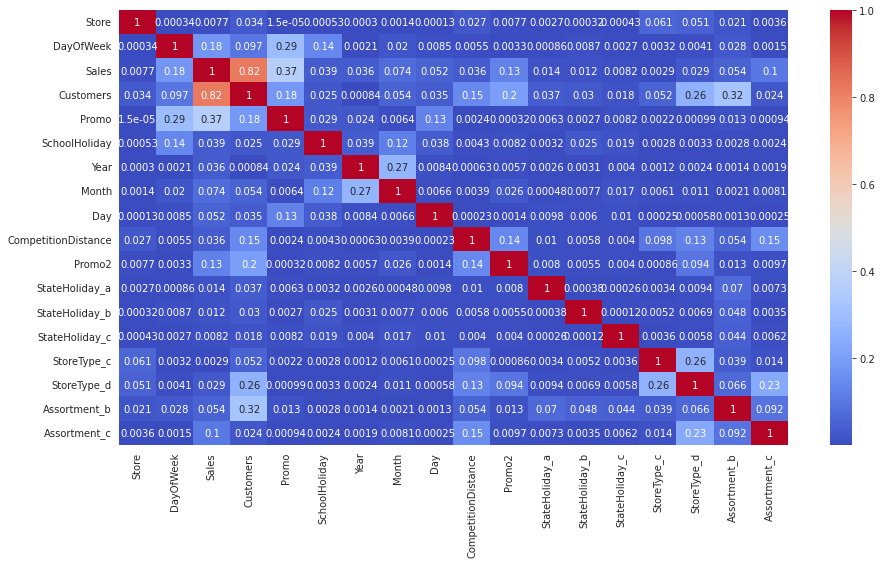

In [36]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

3.12 Pair Plot

### 4. Sales Prediction Through Different Machine learning

In [37]:
df1 = df.drop(['Date','Store'], axis = 1)

In [38]:
# Dividing the dataset into dependent variables and independent variablesY
y = df1['Sales']
X = df1.drop(['Sales'],axis = 1)

In [39]:
#pip install scikit-optimize

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
#from skopt import BayesSearchCV
#from skopt.space import Real,Categorical,Integer
from sklearn import ensemble
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error as mape


In [41]:
X.head()

,DayOfWeek,Customers,Promo,SchoolHoliday,Year,Month,Day,CompetitionDistance,Promo2,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,5,555,1,1,2015,7,31,1270.0,0,0,0,0,1,0,0,0
1,5,625,1,1,2015,7,31,570.0,1,0,0,0,0,0,0,0
2,5,821,1,1,2015,7,31,14130.0,1,0,0,0,0,0,0,0
3,5,1498,1,1,2015,7,31,620.0,0,0,0,0,1,0,0,1
4,5,559,1,1,2015,7,31,29910.0,0,0,0,0,0,0,0,0


In [42]:
X_train, X_test, y_train, y_test = train_test_split( X,y,
                                                    test_size = 0.2,
                                                    random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(675470, 16)
(168868, 16)


**Now Lets implement 3 models on our dataset**


1.   **Linear Regresssion**
  Lasso, Ridge regression and Elastic regression

2.   **Random Forest**
3.   **XGBoost**
**We will be using threee search algorithms for each:**

**1. GridSearchCV**

**2. RandomSearchCV**

**3.BayesianSearchCV**


#### Implementing the machine learning without the hypertunning and cross-Fold

In [43]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

For the practise only

In [44]:
#Fitting Linear regression to the training set
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [45]:
# definte RMSE function
def validation_metrics(X_train, X_test, y_train, y_test,model):
    def rmse(x, y):
        return sqrt(mse(x, y))


    # get cross validation scores 
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)

    print(f"Regresion Model Score :  {model.score(X_train, y_train)}")
    print(f"Out of Sample Test Score :{model.score(X_test, y_test)}")

    print(f"Training R2 Score: {rmse(y_train,y_pred_train)}")
    print("Testing R2 Score",".",rmse(y_test,y_pred))

    print(f"Training MSE : {mse(y_train,y_pred_train)}")
    print(f"Testing MSE: {mse(y_test,y_pred)}")
    print(f"Training MAPE {mape(y_train, y_pred_train)}")
    print(f"Testing MAPE : {mape(y_test, y_pred)}")

In [46]:
validation_metrics(X_train, X_test, y_train, y_test,reg)

Regresion Model Score :  0.817415266833451
Out of Sample Test Score :0.8151506056219144
Training R2 Score: 1325.7635561954578
Testing R2 Score . 1336.4425235428878
Training MSE : 1757649.006936027
Testing MSE: 1786078.6187336822
Training MAPE 0.1458314944832165
Testing MAPE : 0.14604826247088573


In [47]:
reg.coef_

array([-2.86570001e+02,  3.91069322e+04,  1.17740464e+03,  3.32085732e+01,
        3.49074672e+02,  3.96948635e+02,  4.29931002e+01,  1.94498448e+03,
        3.08793186e+02, -4.74607171e+02, -7.39515224e+02,  1.27033619e+03,
       -9.63257126e+01,  1.12565154e+03, -6.95418601e+03,  3.49674465e+02])

In [48]:
reg.intercept_

104.13041640392385

In [49]:
parameters = {'fit_intercept':[True,False], 
              'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(reg,parameters, cv=None)
grid.fit(X_train, y_train)
print("r2 / variance : ", grid.best_score_)
print(f"Residual sum of squares: %.2f {np.mean((grid.predict(X_test) - y_test) ** 2)}")

r2 / variance :  0.8173963339733719
Residual sum of squares: %.2f 1786078.618733708


In [50]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.001 , max_iter= 50)

lasso.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=50)

In [51]:
lasso.score(X_train, y_train)

0.8174152647540257

In [52]:
validation_metrics(X_train, X_test, y_train, y_test,lasso)

Regresion Model Score :  0.8174152647540257
Out of Sample Test Score :0.8151507076756532
Training R2 Score: 1325.7635637449014
Testing R2 Score . 1336.4421546237052
Training MSE : 1757649.026953581
Testing MSE: 1786077.6326552513
Training MAPE 0.14583185140476165
Testing MAPE : 0.14604866066532518


In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [55]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -1757814.3618531052


In [56]:
validation_metrics(X_train, X_test, y_train, y_test,lasso_regressor)

Regresion Model Score :  -1757649.006936027
Out of Sample Test Score :-1786078.6187336827
Training R2 Score: 1325.7635561954578
Testing R2 Score . 1336.442523542888
Training MSE : 1757649.006936027
Testing MSE: 1786078.6187336827
Training MAPE 0.14583149448321656
Testing MAPE : 0.14604826247088584


In [57]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [58]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [59]:
validation_metrics(X_train, X_test, y_train, y_test,ridge)

Regresion Model Score :  0.8174152658081977
Out of Sample Test Score :0.8151509793042312
Training R2 Score: 1325.7635599176847
Testing R2 Score . 1336.4411726994285
Training MSE : 1757649.0168056125
Testing MSE: 1786075.0080862236
Training MAPE 0.14583341043660117
Testing MAPE : 0.14605015796416268


In [60]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5]},
             scoring='neg_mean_squared_error')

In [61]:
validation_metrics(X_train, X_test, y_train, y_test,ridge_regressor)

Regresion Model Score :  -1757649.0070347437
Out of Sample Test Score :-1786078.2567461436
Training R2 Score: 1325.763556232688
Testing R2 Score . 1336.442388113361
Training MSE : 1757649.0070347437
Testing MSE: 1786078.2567461436
Training MAPE 0.14583168601822774
Testing MAPE : 0.14604845187115265


In [62]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [63]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [64]:
validation_metrics(X_train, X_test, y_train, y_test,elasticnet)

Regresion Model Score :  0.27150875726594115
Out of Sample Test Score :0.2713253552548396
Training R2 Score: 2648.1709291946117
Testing R2 Score . 2653.4328330086237
Training MSE : 7012809.270231453
Testing MSE: 7040705.79928817
Training MAPE 0.3251672601950179
Testing MAPE : 0.3257724092363944


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

In [66]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators= 30)
rdf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30)

In [ ]:
validation_metrics(X_train, X_test, y_train, y_test,rdf)

In [ ]:
features = X_train.columns

In [ ]:
features

In [ ]:
features = X_train.columns
importances = rdf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')